## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. You can add more notebook cells or edit existing notebook cells other than "# YOUR CODE HERE" to test out or debug your code. We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Deep Learning - Generative Adversarial Networks

In [1]:
import tensorflow as tf
# Hide tensorflow warnings
tf.get_logger().setLevel('ERROR')
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Reshape, Input
from tensorflow.keras import Model, Sequential

import numpy as np
np.random.seed(0)
import matplotlib
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In this exercise we will build a GAN using the MNIST dataset. If everything goes well and you're able to train the GAN correctly, you should be able to generate handwritten digits that never existed before.

In [ ]:
img_shape = x_train[0].shape
latent_dim = 100 # This is the dimension of the random noise we'll use for the generator
batch_size = 128
epochs = 1000

In [ ]:
# Create generator_layers which are the layers for the generator model
# The generator model should have 3 dense layers of 256, 512, and 1024 units respectively
# After each Dense layer apply a BatchNormalization with a momentum value between 0.7 and 0.9
# Finalize the layers with a final output layer followed by a Reshape layer to get it to the right size

# Think about what the input to the generator is and what the output should be

generator_layers = []
generator_layers.append(Dense(256, input_dim=latent_dim, activation='relu'))
generator_layers.append(BatchNormalization(momentum=0.8))
generator_layers.append(Dense(512, activation='relu'))
generator_layers.append(BatchNormalization(momentum=0.8))
generator_layers.append(Dense(1024, activation='relu'))
generator_layers.append(BatchNormalization(momentum=0.8))
generator_layers.append(Dense(784, activation='tanh'))
generator_layers.append(Reshape(img_shape))

generator = Sequential(generator_layers)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

In [ ]:
assert generator
assert len(generator_layers) == 8
assert isinstance(generator_layers[0], Dense)
assert isinstance(generator_layers[2], Dense)
assert isinstance(generator_layers[4], Dense)
assert isinstance(generator_layers[6], Dense)
assert isinstance(generator_layers[1], BatchNormalization)
assert isinstance(generator_layers[3], BatchNormalization)
assert isinstance(generator_layers[5], BatchNormalization)

In [ ]:
# Create discriminator_layers which are the layers for the discriminator model
# The discriminator model should have 2 Dense layers with 512, 256 units respectively
# Add the appropriate output layer and activation function

# Think about what the input and output for a discriminator model would be

discriminator_layers = []
discriminator_layers.append(Flatten(input_shape=img_shape))
discriminator_layers.append(Dense(512, activation='relu'))
discriminator_layers.append(Dense(256, activation='relu'))
discriminator_layers.append(Dense(1, activation='sigmoid'))

discriminator = Sequential(discriminator_layers)
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
assert discriminator
assert len(discriminator_layers) == 4

Training GANs is a bit more complex than other networks so the below code is provided for you as is. You may reuse this code for your own edification but are not expected to have figured it out on your own.

You are also likely to not be able to get good results in the time allocated for this exercise. However, you should easily be able to see examples of mode collapse.

In [ ]:
discriminator.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer="adam")

In [ ]:
# Rescale -1 to 1
x_train = x_train / 127.5 - 1.
# x_train = np.expand_dims(x_train, axis=3)

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

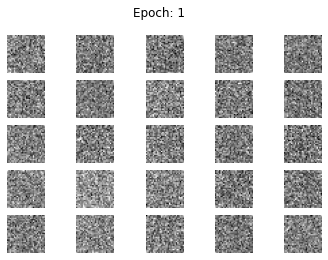

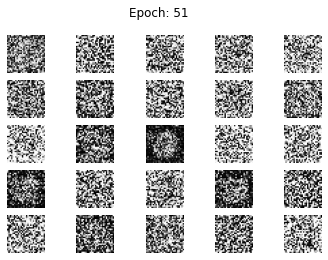

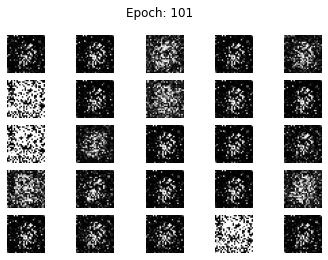

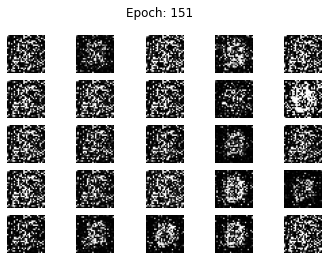

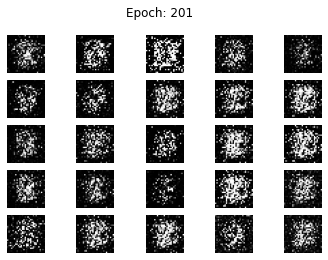

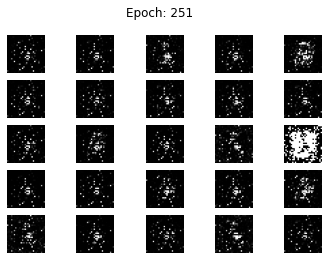

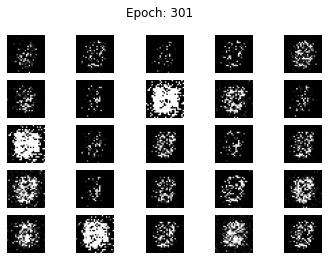

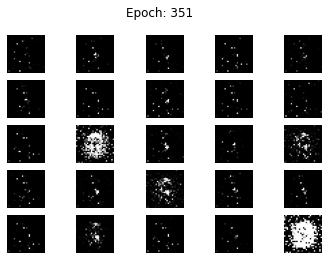

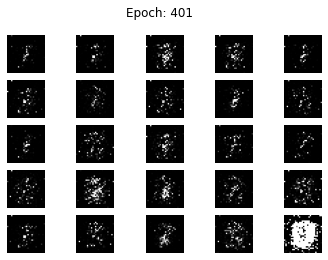

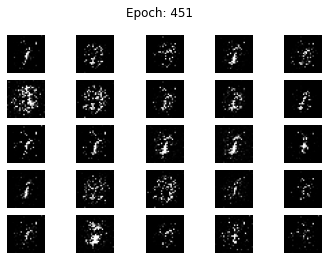

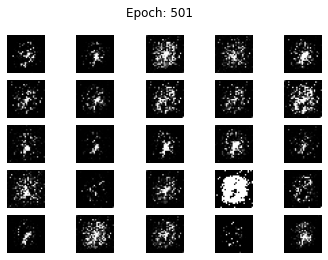

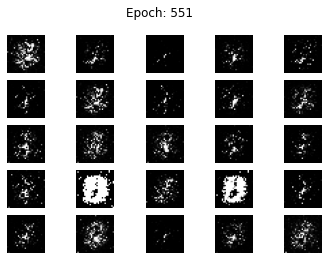

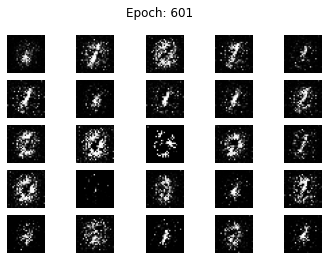

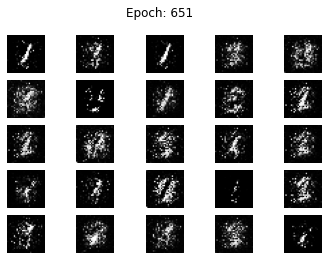

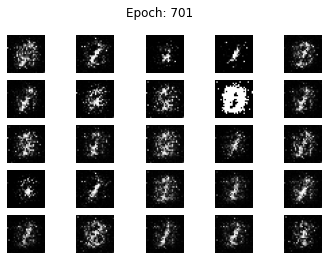

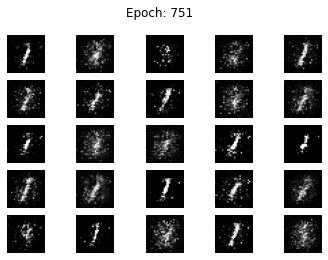

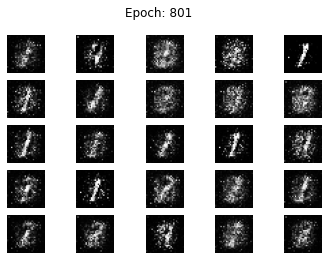

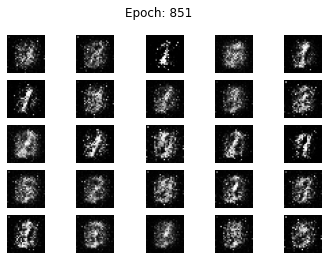

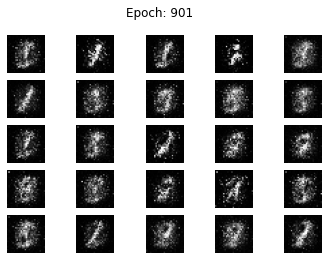

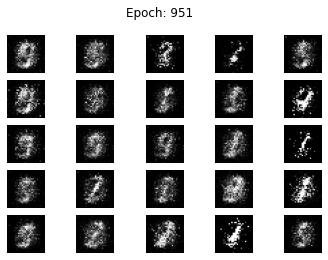

In [ ]:
for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random batch of images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imgs = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate a batch of new images
    gen_imgs = generator.predict(noise)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    discriminator.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    discriminator.trainable = False
    g_loss = combined.train_on_batch(noise, valid)
    
    if epoch % 50 == 0:
        r, c = 5,5
        noise = np.random.normal(0, 1, (r*c, latent_dim))
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.suptitle(f"Epoch: {epoch+1}")
        plt.show()

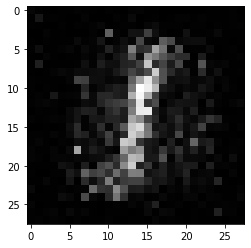

In [ ]:
# Generate another "digit"
noise = np.random.normal(0, 1, (1, latent_dim))
gen_img = generator.predict(noise)[0]
plt.imshow(gen_img, cmap='gray')
plt.show()

## Feedback

In [ ]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    return "All good, looks like a one to me haha"

In [ ]:
print(feedback())